In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==0.24.2
import sklearn
sklearn.__version__

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 5.8MB/s 


'0.24.2'

In [8]:
# load data file (as we did in PSET 1)
from google.colab import drive
# drive.mount('/content/drive/')
drive.mount('gdrive/')

path = 'gdrive/My Drive/Colab/BaBooks'

!ls -l gdrive/MyDrive/pima.csv

Mounted at gdrive/
-rw------- 1 root root 23105 Jun  2 18:29 gdrive/MyDrive/pima.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sea
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.io import loadmat
from scipy.stats import multivariate_normal

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
pima= pd.read_csv('gdrive/MyDrive/pima.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
### SETTING UP FEATURES
numerical_features = [feature for feature in pima.columns if pima[feature].dtypes != 'O']
discs =[feature for feature in numerical_features if len(pima[feature].unique())<25]
conts =[feature for feature in numerical_features if feature not in discs]
cats = ['Pregnancies']

print(numerical_features)
print(discs)
print(cats)
print(conts)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
['Pregnancies', 'Outcome']
['Pregnancies']
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
### Preprocess Data
pc = pima
scaler = StandardScaler()
#pc = pd.get_dummies(pc, columns = cats, drop_first = True)

X = pc.drop(['Outcome'],axis=1)
y = pc[['Outcome']]

#scaling on/off
#pc[conts] = scaler.fit_transform(X[conts])
pc[conts] = X[conts]

# Define features and target
X = pc.drop(['Outcome'],axis=1)
y = pc[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
116,5,124,74,0,0,34.0,0.220,38
602,1,124,74,36,0,27.8,0.100,30
674,8,91,82,0,0,35.6,0.587,68
113,4,76,62,0,0,34.0,0.391,25
739,1,102,74,0,0,39.5,0.293,42


In [ ]:
## Random Forest
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('{:s} : {:.3f}'.format('Random Forest Acc', accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Acc : 0.747


# **PDP Plots**

In [ ]:
### PDP PLOTS
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import seaborn as sns
sns.set()

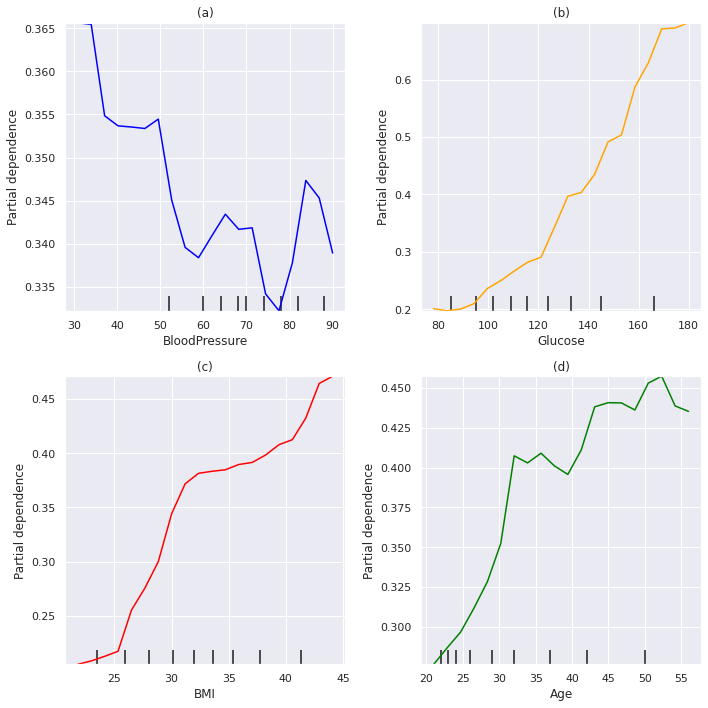

In [ ]:
## ONE-D
fig, axs = plt.subplots(2,2,figsize=(10, 10))

feats_1d = ['BloodPressure']
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[0,0], n_jobs=-1)
axs[0,0].set_title("(a)")
plt.gca().get_lines()[0].set_color("blue")

feats_1d = ['Glucose']
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[0,1], n_jobs=-1,)
axs[0,1].set_title("(b)")
plt.gca().get_lines()[0].set_color("orange")

feats_1d = ['BMI']
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[1,0], n_jobs=-1)
axs[1,0].set_title("(c)")
plt.gca().get_lines()[0].set_color("red")

feats_1d = ['Age']
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[1,1], n_jobs=-1)
axs[1,1].set_title("(d)")
plt.gca().get_lines()[0].set_color("green")

xlim = axs[0,0].get_xlim()
ylim = axs[0,0].get_ylim()



plt.tight_layout()

In [ ]:
axs[0,1].margins()

(0.05, 0.05)

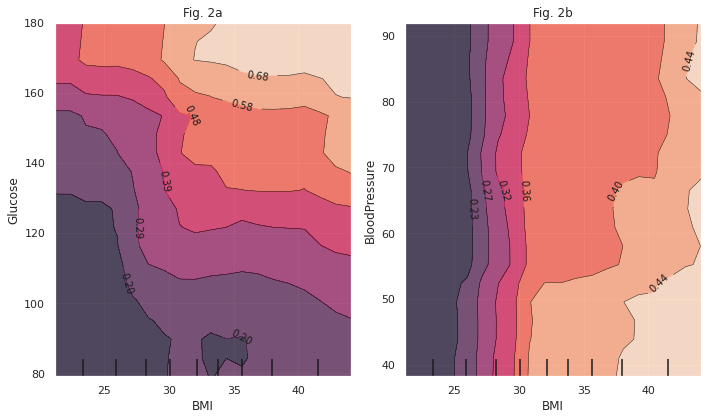

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 6))

feats_1d = [('BMI','Glucose')]
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[0], n_jobs=-1)
axs[0].set_title("Fig. 2a")
plt.tight_layout()

feats_1d = [('BMI','BloodPressure')]
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[1], n_jobs=-1)
axs[1].set_title("Fig. 2b")
plt.tight_layout()


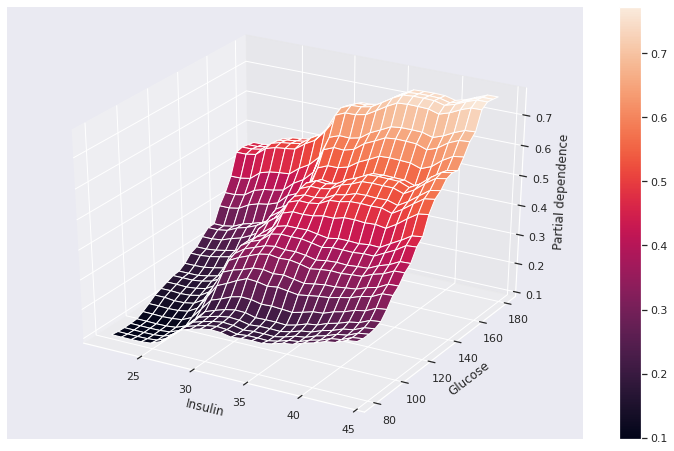

<Figure size 432x288 with 0 Axes>

In [ ]:
## TWO-D
fig_2d = plt.figure(figsize=(10, 6))
ax = Axes3D(fig_2d)

# Prepare PDP Data
feats_2d = ('BMI', 'Glucose')
pdp_2d = partial_dependence(rf, X_train, features=feats_2d, grid_resolution=25, kind="average")
pdp_X, pdp_Y = np.meshgrid(pdp_2d['values'][0], pdp_2d['values'][1])
pdp_Z = pdp_2d.average[0].T

# Generate Plot
surf = ax.plot_surface(pdp_X, pdp_Y, pdp_Z, rstride=1, cstride=1,cmap=plt.get_cmap()) #, edgecolor='k'
ax.set_xlabel('Insulin')
ax.set_ylabel('Glucose')
ax.set_zlabel('Partial dependence')
# ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
#plt.suptitle('Title')
# plt.subplots_adjust(top=0.9)
plt.show()
plt.tight_layout()

# ICE Plots

In [ ]:
### PDP PLOTS
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import seaborn as sns
sns.set()

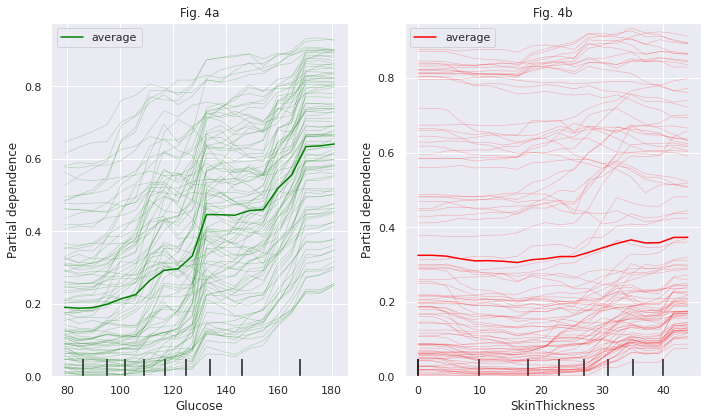

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 6))

feats_1d = ['Glucose']
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[0], n_jobs=-1, kind='both', 
                        line_kw={'color':'green'}, subsample=100)
axs[0].set_title("Fig. 4a")
plt.tight_layout()

feats_1d = ['SkinThickness']
plot_partial_dependence(rf, X_train, feats_1d, grid_resolution=20, ax=axs[1], n_jobs=-1, kind='both',
                        line_kw={'color':'red'}, subsample=100)
axs[1].set_title("Fig. 4b")
plt.tight_layout()


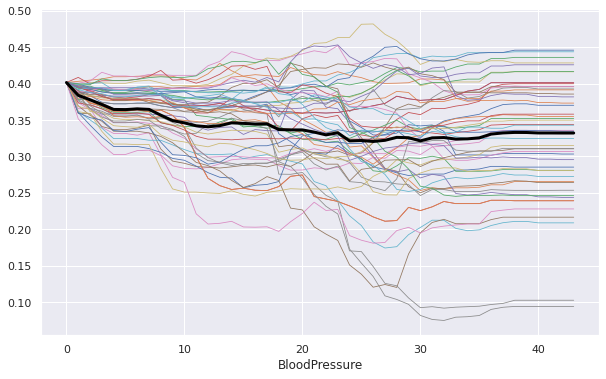

In [ ]:
feat = 'BloodPressure'
ice = partial_dependence(rf, X_train, [feat],kind='both')

lines = ice.individual[0]
origin = ice['average'][0][0]
for i in range(len(lines)):
  offset = lines[i][0]
  for j in range(len(lines[i])):
    lines[i][j] += -offset + origin

fig, axs = plt.subplots(1,figsize=(10, 6))

idx = np.random.randint(614, size=50)
plt.plot(lines[idx,:].T,linewidth=.8)
plt.plot(ice['average'][0],color='black',linewidth=3)
plt.xlabel(feat)
pass

# ALE Plot

In [ ]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

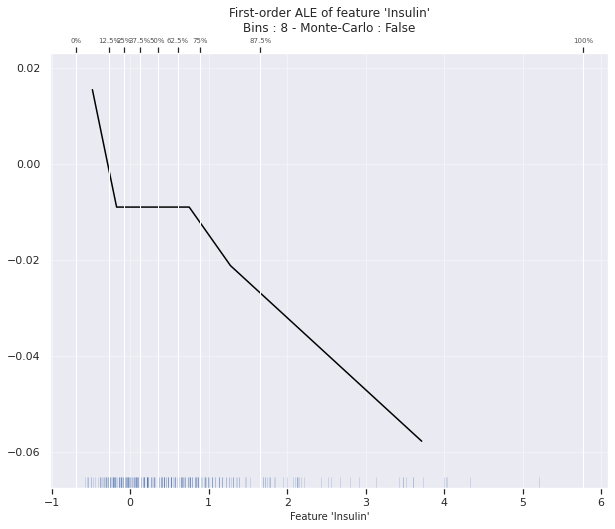

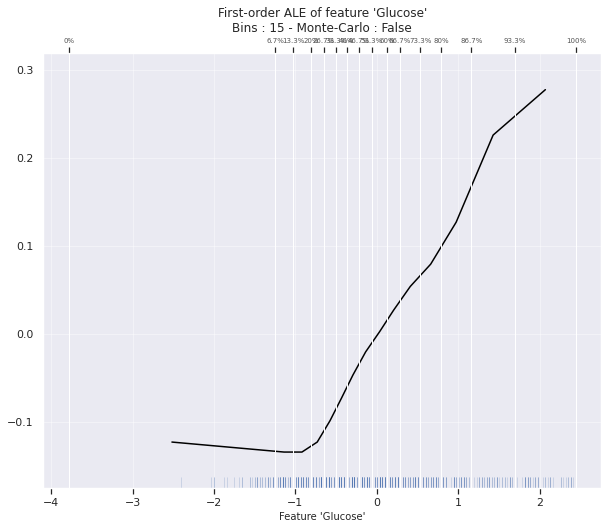

In [ ]:
from alepython import ale_plot

ale_plot(rf, X_train, ["Insulin"], bins=15, monte_carlo=False)
plt.savefig('gdrive/MyDrive/ale1a.jpg')
plt.close()

ale_plot(rf, X_train, ["Glucose"], bins=15, monte_carlo=False)
plt.savefig('gdrive/MyDrive/ale1b.jpg')
plt.close()

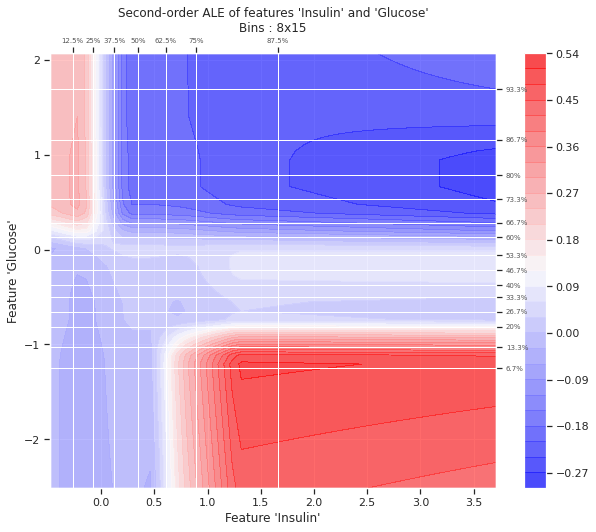

<Figure size 720x576 with 0 Axes>

In [ ]:
from alepython import ale_plot



### Use BMI and Insulin
# Plot gradient of BMI+Insulin
ale_plot(rf, X_train, ["Insulin","Glucose"], bins=15, monte_carlo=False)
plt.rc('axes', labelsize=10)
plt.tight_layout()



# PyALE

In [ ]:
!pip install PyALE

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


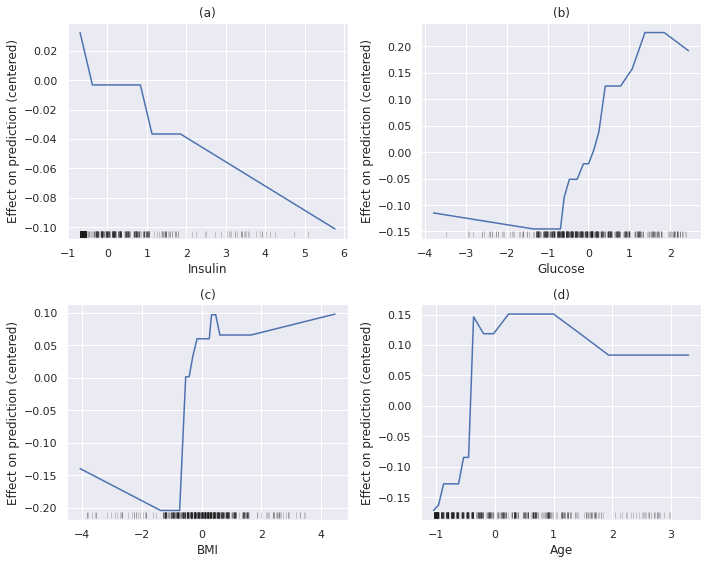

In [ ]:
from PyALE import ale
import seaborn as sns

sns.set()

## ONE-D
fig, ax = plt.subplots(2,2,figsize=(10,8))

ale_eff1 = ale(X=X_train, model=rf, feature=["Insulin"], grid_size=20, fig=fig, ax=ax[0,0],include_CI=False)
ax[0,0].set_title("(a)")

ale_eff2 = ale(X=X_train, model=rf, feature=["Glucose"], grid_size=20, fig=fig, ax=ax[0,1],include_CI=False)
ax[0,1].set_title("(b)")

ale_eff3 = ale(X=X_train, model=rf, feature=["BMI"], grid_size=20, fig=fig, ax=ax[1,0],include_CI=False)
ax[1,0].set_title("(c)")

ale_eff4 = ale(X=X_train, model=rf, feature=["Age"], grid_size=20, fig=fig, ax=ax[1,1],include_CI=False)
ax[1,1].set_title("(d)")

plt.tight_layout()



# Ceteris Paribus

In [3]:
!pip install pyCeterisParibus

In [4]:
import numpy as np
import pandas as pd
import seaborn as sea
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.io import loadmat
from scipy.stats import multivariate_normal

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [13]:
pima= pd.read_csv('gdrive/MyDrive/pima.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
numerical_features = [feature for feature in pima.columns if pima[feature].dtypes != 'O']
discs =[feature for feature in numerical_features if len(pima[feature].unique())<25]
conts =[feature for feature in numerical_features if feature not in discs]

### Preprocess Data
pc = pima
scaler = StandardScaler()
#pc = pd.get_dummies(pc, columns = cats, drop_first = True)

X = pc.drop(['Outcome'],axis=1)
y = pc[['Outcome']]

#pc[conts] = scaler.fit_transform(X[conts])
pc[conts] = X[conts]

# Define features and target
X = pc.drop(['Outcome'],axis=1)
y = pc[['Outcome']].Outcome
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
613,6,105,80,28,0,32.5,0.878,26
679,2,101,58,17,265,24.2,0.614,23
264,4,123,62,0,0,32.0,0.226,35
705,6,80,80,36,0,39.8,0.177,28
297,0,126,84,29,215,30.7,0.520,24


In [15]:
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from ceteris_paribus.explainer import explain
explainer_logistic = explain(clf, data=X, y=y, label='Logistic',
    predict_function=lambda X: clf.predict_proba(X)[::, 1])

In [17]:
instance = X_test.iloc[10]
label = y_test.iloc[10]
from ceteris_paribus.profiles import individual_variable_profile
cp_logistic = individual_variable_profile(explainer_logistic, instance, label)

In [20]:
from ceteris_paribus.plots.plots import plot_notebook, plot
plot_notebook(cp_logistic, selected_variables=["Age"])